### 1.0 Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import datetime


In [2]:
data_src = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
original_data = pd.read_csv(data_src)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = original_data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621847 entries, 0 to 2621846
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

### Data analyses

In [5]:
data.date = pd.to_datetime(data.date)
data.set_index("date", inplace=True)

In [6]:
data.drop(["country_region_code", "metro_area", "iso_3166_2_code", "census_fips_code"], axis=1, inplace=True)

In [7]:
data.columns = list(map(lambda x: x.replace("_percent_change_from_baseline", ""), data.columns))

In [8]:
data.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2621847 entries, 2020-02-15 to 2020-09-25
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   country_region         object 
 1   sub_region_1           object 
 2   sub_region_2           object 
 3   retail_and_recreation  float64
 4   grocery_and_pharmacy   float64
 5   parks                  float64
 6   transit_stations       float64
 7   workplaces             float64
 8   residential            float64
dtypes: float64(6), object(3)
memory usage: 200.0+ MB


In [10]:
data_br = data[data.country_region == "Brazil"]
data_br.drop("country_region", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
data_br.sub_region_1.unique()

array([nan, 'Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [12]:
data_br_states = data_br[~data_br.sub_region_1.isnull() & data_br.sub_region_2.isnull()]
data_br_states.drop("sub_region_2", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
states_by_region = {
    "Norte": ["Acre", "Amapá", "Amazonas", "Pará", "Rondônia", "Roraima", "Tocantins"],
    "Nordeste": ["Alagoas", "Bahia", "Ceará", "Maranhão", "Paraíba", "Pernambuco",
        "Piauí", "Rio Grande do Norte", "Sergipe"],
    "Centro-Oeste": ["Goiás", "Mato Grosso", "Mato Grosso do Sul"],
    "Sudeste": ["Espírito Santo", "Minas Gerais", "Rio de Janeiro", "São Paulo"],
    "Sul": ["Paraná", "Rio Grande do Sul", "Santa Catarina"]
}
for region in states_by_region.keys():
    states_by_region[region] = [f"State of {state}" for state in states_by_region[region]]
states_by_region["Centro-Oeste"].append("Federal District")

region_by_state = {}
ustates = data_br.sub_region_1.unique()
for region, states in states_by_region.items():
    for state in states:
        region_by_state[state] = region
        check = "ok" if state in  ustates else "Ops"
        print(f"{check}\t{region} - {state}")

ok	Norte - State of Acre
ok	Norte - State of Amapá
ok	Norte - State of Amazonas
ok	Norte - State of Pará
ok	Norte - State of Rondônia
ok	Norte - State of Roraima
ok	Norte - State of Tocantins
ok	Nordeste - State of Alagoas
ok	Nordeste - State of Bahia
ok	Nordeste - State of Ceará
ok	Nordeste - State of Maranhão
ok	Nordeste - State of Paraíba
ok	Nordeste - State of Pernambuco
ok	Nordeste - State of Piauí
ok	Nordeste - State of Rio Grande do Norte
ok	Nordeste - State of Sergipe
ok	Centro-Oeste - State of Goiás
ok	Centro-Oeste - State of Mato Grosso
ok	Centro-Oeste - State of Mato Grosso do Sul
ok	Centro-Oeste - Federal District
ok	Sudeste - State of Espírito Santo
ok	Sudeste - State of Minas Gerais
ok	Sudeste - State of Rio de Janeiro
ok	Sudeste - State of São Paulo
ok	Sul - State of Paraná
ok	Sul - State of Rio Grande do Sul
ok	Sul - State of Santa Catarina


In [14]:
data_br_states["sub_region_0"] = data_br_states.apply (lambda row: region_by_state[row["sub_region_1"]], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
data_br_states.iloc[[0, 500, 1000],[0, 7]]

,sub_region_1,sub_region_0
date,,
2020-02-15,Federal District,Centro-Oeste
2020-04-03,State of Alagoas,Nordeste
2020-05-21,State of Amazonas,Norte


In [ ]:
### Visualization

In [54]:
plt.style.use("fivethirtyeight")

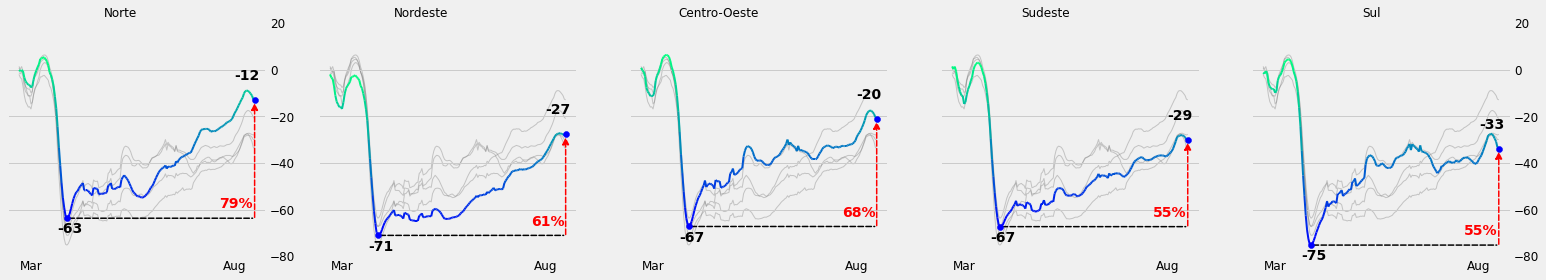

In [126]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(24,4))
item = "retail_and_recreation"
line = None
for i, region in enumerate(states_by_region.keys()):
    # Dados que serão plotados
    item_data = data_br_states.groupby(by=[data_br_states.index,"sub_region_0"]).mean().unstack()[item]
    region_data = item_data[region]

    # Customização de aparencia
    ax[i].set_title(region,fontsize=12,ha='right')
    ax[i].xaxis.grid(False)
    ax[i].set_xlabel("")
    ax[i].xaxis.set_tick_params(labelsize=12)
    ax[i].yaxis.set_tick_params(labelsize=12)

    # plotagem do gráfico
    y = item_data[region].rolling(window=7).mean().dropna()
    x = y.index
    inxval = md.date2num(x)

    points = np.array([inxval, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    norm = plt.Normalize(y.min(), y.max())
    lc = LineCollection(segments, cmap='winter', norm=norm)
    lc.set_array(y)
    lc.set_linewidth(2)
    line = ax[i].add_collection(lc)

    # Customização dos eixos
    ax[i].set_xticklabels(["Mar","","","","","Aug","Sep"])
    ax[i].set_ylim(-80, 20)
   
    if (i==0) or (i==4):
        ax[i].yaxis.tick_right()
    else:
        ax[i].set_yticklabels([])

    # Posições das anotações
    ymin = y.idxmin()
    x1 = md.date2num(x[-1])
    x0 = md.date2num(ymin)
    y0 = y.min()
    y1 = y[-1]
   
    # Seta e reta
    ax[i].annotate("", xy=(x1, y1-0.5), xytext=(x1, y0-0.5), xycoords='data',
                arrowprops=dict(linewidth=1.5, arrowstyle='-|>', 
                                linestyle='--', color='red', zorder=2))
    ax[i].annotate("", xy=(x1, y0), xytext=(x0, y0), xycoords='data',
                arrowprops=dict(linewidth=1.5, arrowstyle='-', 
                                linestyle='--', color='black'), zorder=2)
    # texto
    ax[i].annotate(f"{int(y0)}",
            xy=(x0, y0), xycoords='data', textcoords='offset points', weight='bold',
            xytext=(-10, -15) 
            )
    ax[i].annotate(f"{int(y1)}",
            xy=(x1, y1), xycoords='data', textcoords='offset points', weight='bold',
            xytext=(-20, 20) 
            )

    ax[i].annotate(f"{int(100-(y1*100/y0))}%", color = 'red', weight='bold',
            xy=(x1, y0), xycoords='data', textcoords='offset points',
            xytext=(-35, 10) 
            )

    ax[i].scatter([x0, x1], [y0, y1], marker='o', color="blue", alpha=1.0, zorder=3)

    # Plot das outras regiões
    for other_region in states_by_region.keys():
        if (other_region != region):
            y = item_data[other_region].rolling(window=7).mean()
            x = y.index
            ax[i].plot(x, y, color="grey", linewidth=1, alpha=0.4, zorder=0)

plt.colorbar(line, ax=ax)
plt.savefig("onefigureproject_1.png", dpi=300)
plt.show()